In [3]:
import streamlit as st
from supabase import create_client, Client
from dotenv import load_dotenv
import os, json
from datetime import datetime
from urllib.parse import urlparse, parse_qs
import pandas as pd

def load_google_sheet(sheet_url):
    # Convert Google Sheets view URL to CSV export URL
    if "/edit" in sheet_url:
        sheet_url = sheet_url.split("/edit")[0]
    csv_url = sheet_url.replace("/edit", "") + "/export?format=csv"
    
    try:
        df = pd.read_csv(csv_url)
        st.success("Data loaded successfully from Google Sheet.")
        return df
    except Exception as e:
        st.error(f"Failed to load sheet: {e}")
        return None

In [2]:
df = load_google_sheet("https://docs.google.com/spreadsheets/d/1Hv-wBLu9OCTSBQTurHrB13MfzHXLc0hMe8dTTqc-YzI/edit?resourcekey=&gid=787091333#gid=787091333")
df.head()

2025-08-06 17:42:29.751 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 17:42:31.019 
  command:

    streamlit run e:\Retail_Bhai\DigiSaarthi\ds_env\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-06 17:42:31.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-06 17:42:31.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


,Timestamp,Customer Name,Customer Mobile Number,# Saree,# Suits,# Men's Wear,Customer Behaviour,Total Sales,Gender,# Others,Udhaar
0,8/5/2025 17:32:57,Rishabh Agrawal,9027961898,NaN,NaN,2,No Bargain,2000,Male,NaN,NaN
1,8/5/2025 22:07:08,NaN,9411403569,2.0,NaN,NaN,No Bargain,1000,Male,NaN,NaN
2,8/6/2025 13:49:35,NaN,7505331621,NaN,NaN,1 paint shirt,Bargain's Alot,470,Male,NaN,No
3,8/6/2025 13:50:21,NaN,7302995691,NaN,NaN,1 Paint shirt,Bargain's Alot,500,Female,NaN,No
4,8/6/2025 13:51:53,NaN,9719968016,NaN,NaN,Shirt 1,Bargain's Alot,250,Male,NaN,No


In [4]:
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
print(df.columns)

Index(['timestamp', 'customer_name', 'customer_mobile_number', '#_saree',
       '#_suits', '#_men's_wear', 'customer_behaviour', 'total_sales',
       'gender', '#_others', 'udhaar'],
      dtype='object')


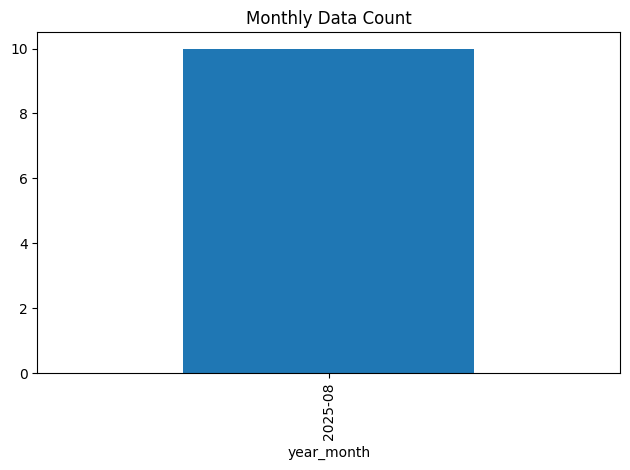

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df["year_month"] = df['timestamp'].dt.to_period('M')
df.groupby('year_month').size().plot(kind='bar', title='Monthly Data Count')
plt.tight_layout()
plt.show()

In [11]:
import plotly.graph_objs as go
import plotly.subplots as sp

def run_customer_analytics(df, customer_col, date_col):
    for period, label in [('M', 'MoM'), ('W', 'WoW'), ('D', 'DoD')]:
        active = get_active_customers(df, customer_col, date_col, period)
        repeaters = get_repeating_customers(df, customer_col, date_col, period)
        active_growth = get_growth(active)
        repeaters_growth = get_growth(repeaters)
        result = pd.DataFrame({
            'Active_Customers': active,
            'Repeating_Customers': repeaters,
            f'Active_{label}_Growth': active_growth,
            f'Repeating_{label}_Growth': repeaters_growth
        })

        print(f"\n==== {label} (Period: {period}) ====")
        display(result)

        # Plotly interactive plots
        fig = sp.make_subplots(
            rows=2, cols=1, shared_xaxes=True,
            subplot_titles=(f"{label}: Active & Repeating Customers", f"{label}: Growth Rates")
        )

        # Active & Repeating Customers
        fig.add_trace(go.Scatter(
            x=result.index.astype(str), y=result['Active_Customers'],
            mode='lines+markers', name='Active Customers'
        ), row=1, col=1)
        fig.add_trace(go.Scatter(
            x=result.index.astype(str), y=result['Repeating_Customers'],
            mode='lines+markers', name='Repeating Customers'
        ), row=1, col=1)

        # Growth Rates
        fig.add_trace(go.Bar(
            x=result.index.astype(str), y=result[f'Active_{label}_Growth'],
            name='Active Growth'
        ), row=2, col=1)
        fig.add_trace(go.Bar(
            x=result.index.astype(str), y=result[f'Repeating_{label}_Growth'],
            name='Repeating Growth'
        ), row=2, col=1)

        fig.update_layout(height=600, width=900, title_text=f"{label} Customer Analytics", barmode='group')
        fig.update_xaxes(title_text="Period")
        fig.update_yaxes(title_text="Count", row=1, col=1)
        fig.update_yaxes(title_text="Growth Rate", row=2, col=1)
        fig.show()

In [12]:
run_customer_analytics(df, customer_col='Contact', date_col='Timestamp')


==== MoM (Period: M) ====


C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_7072\1518089357.py:4: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_7072\1518089357.py:8: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Active_Customers,Repeating_Customers,Active_MoM_Growth,Repeating_MoM_Growth
2025-07,20,NaN,NaN,NaN
2025-08,20,10.0,0.0,NaN
2025-09,20,12.0,0.0,0.2



==== WoW (Period: W) ====


C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_7072\1518089357.py:4: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_7072\1518089357.py:8: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Active_Customers,Repeating_Customers,Active_WoW_Growth,Repeating_WoW_Growth
2025-06-30/2025-07-06,3,NaN,NaN,NaN
2025-07-07/2025-07-13,2,0.0,-0.333333,NaN
2025-07-14/2025-07-20,8,0.0,3.000000,NaN
2025-07-21/2025-07-27,7,0.0,-0.125000,NaN
2025-07-28/2025-08-03,2,0.0,-0.714286,NaN
2025-08-04/2025-08-10,6,0.0,2.000000,NaN
2025-08-11/2025-08-17,6,0.0,0.000000,NaN
2025-08-18/2025-08-24,3,0.0,-0.500000,NaN
2025-08-25/2025-08-31,3,0.0,0.000000,NaN
2025-09-01/2025-09-07,3,0.0,0.000000,NaN



==== DoD (Period: D) ====


C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_7072\1518089357.py:4: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_7072\1518089357.py:8: UserWarning:

Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



,Active_Customers,Repeating_Customers,Active_DoD_Growth,Repeating_DoD_Growth
2025-07-01,1,NaN,NaN,NaN
2025-07-02,1,0.0,0.000000,NaN
2025-07-06,1,0.0,0.000000,NaN
2025-07-11,2,0.0,1.000000,NaN
2025-07-14,1,0.0,-0.500000,NaN
2025-07-15,3,0.0,2.000000,NaN
2025-07-17,2,0.0,-0.333333,NaN
2025-07-19,1,0.0,-0.500000,NaN
2025-07-20,1,0.0,0.000000,NaN
2025-07-22,2,0.0,1.000000,NaN
